## マイクの指向性調査

標準マイクの角度ごとのスペクトルを調べる  
0,30,45,60,90° で測定


In [1]:
import sys

sys.path.append("../")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from positioning.readwav import readwav
from positioning.get_spectrum_amplitude import (
    get_spectrum_amplitude,
    extract_signal_start,
)

In [3]:
sns.set()

In [4]:
angle_list = np.array([0, 30, 45, 60, 90])

In [6]:
df_mic = pd.DataFrame()
for angle in angle_list:
    signal = readwav(f"../data/mic-angle/angle{angle}.wav")
    first_i = extract_signal_start(signal)
    spectrum = np.abs(np.fft.fft(signal[first_i : first_i + 96000]))
    freqs = np.fft.fftfreq(96000, d=1 / 48000)
    df_mic_angle = pd.DataFrame({"frequency": freqs, "spectrum": spectrum})
    df_mic_angle["angle"] = angle
    df_mic = pd.concat([df_mic, df_mic_angle])

In [8]:
df_mic.head()

,frequency,spectrum,angle
0,0.0,5.757703e+06,0
1,0.5,1.255132e+07,0
2,1.0,6.418028e+07,0
3,1.5,1.764630e+07,0
4,2.0,3.695404e+07,0


In [12]:
df_mic_needed = df_mic.query("frequency >= 4000 and frequency <= 13000")
df_mic_needed.head()

,frequency,spectrum,angle
8000,4000.0,1.171628e+06,0
8001,4000.5,8.395995e+05,0
8002,4001.0,7.680788e+05,0
8003,4001.5,7.278207e+05,0
8004,4002.0,7.105441e+05,0


In [19]:
band_freq = np.arange(4000, 13000, 1000)
df_mic_eachband = df_mic.query("frequency in @band_freq").reset_index()
df_mic_eachband.head()

,index,frequency,spectrum,angle
0,8000,4000.0,1.171628e+06,0
1,10000,5000.0,4.611650e+05,0
2,12000,6000.0,3.466720e+05,0
3,14000,7000.0,1.232042e+05,0
4,16000,8000.0,1.533951e+05,0


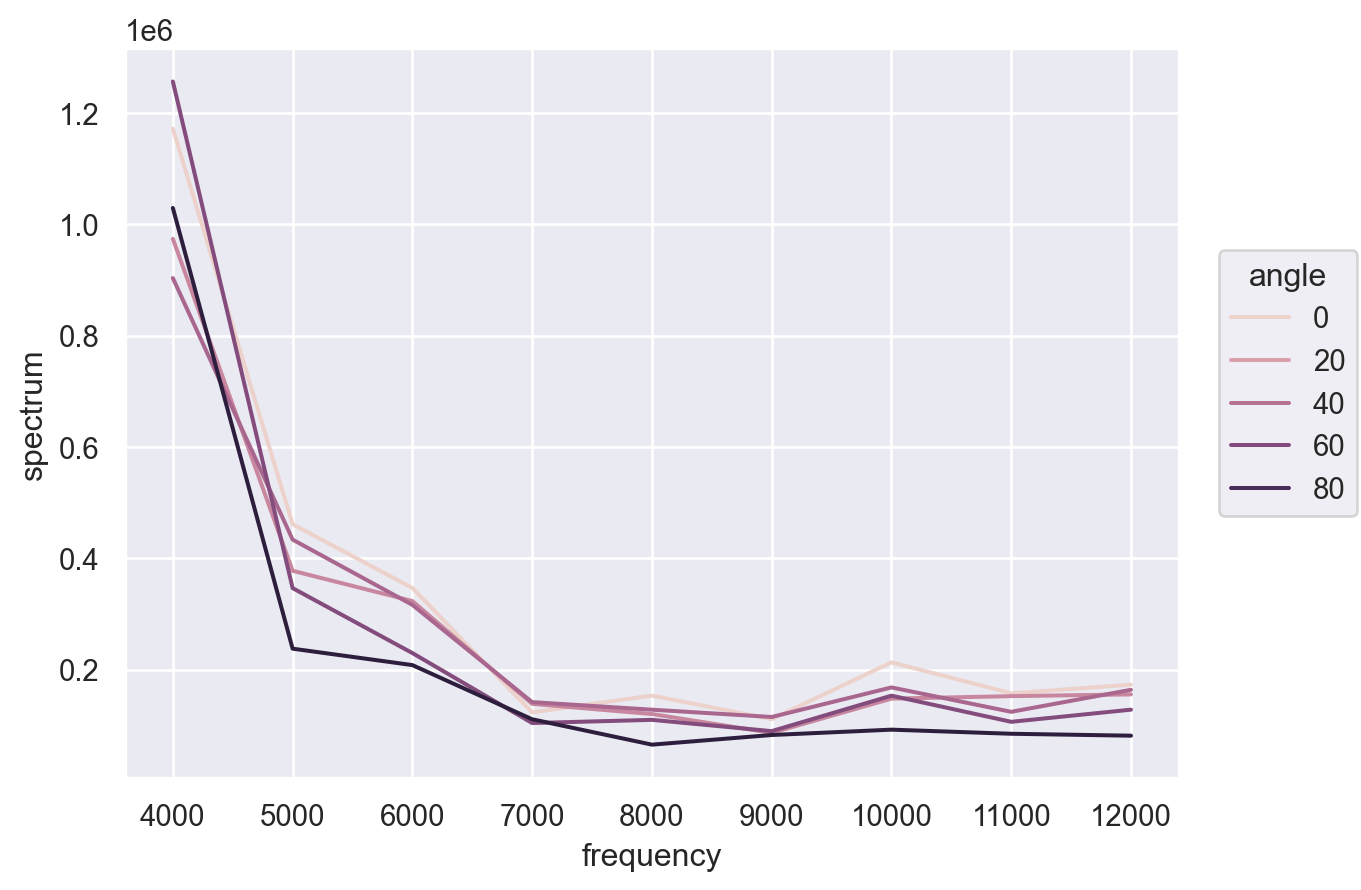

In [21]:
so.Plot(df_mic_eachband, x="frequency", y="spectrum", color="angle").add(so.Line())

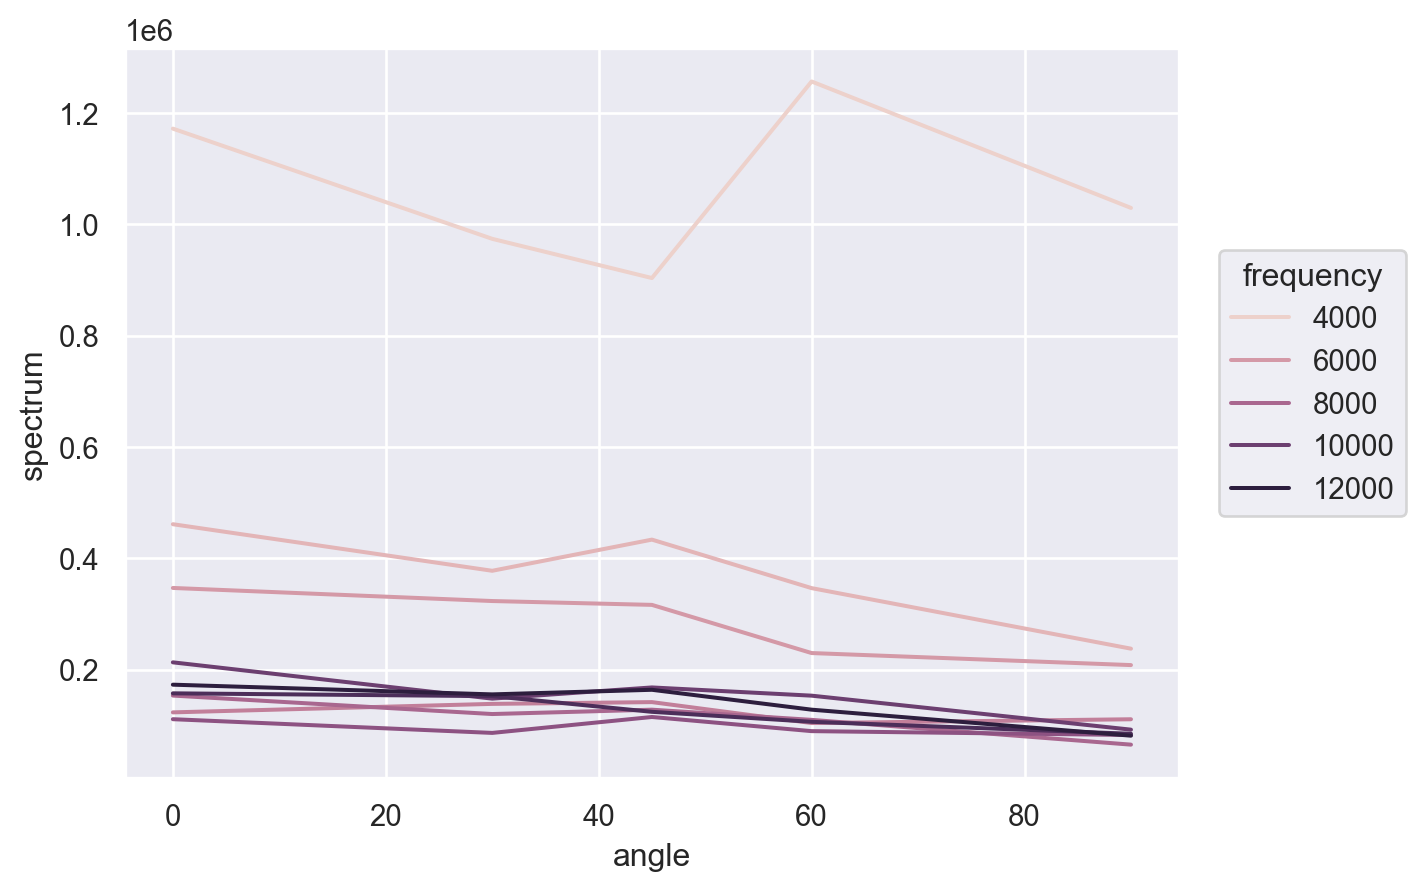

In [23]:
so.Plot(df_mic_eachband, x="angle", y="spectrum", color="frequency").add(so.Line())

In [26]:
df_mic_avg = pd.DataFrame()
for angle in angle_list:
    signal = readwav(f"../data/mic-angle/angle{angle}.wav")
    spectrum_list = np.empty(96000)
    for i in range(30):
        first_i = extract_signal_start(signal[i * 96000 : (i + 2) * 96000])
        spectrum = np.abs(np.fft.fft(signal[first_i : first_i + 96000]))
        spectrum_list = np.vstack((spectrum_list, spectrum))
    spectrum_avg = np.mean(spectrum_list[1:, :], axis=0)
    freqs = np.fft.fftfreq(96000, d=1 / 48000)
    df_mic_angle = pd.DataFrame({"frequency": freqs, "spectrum": spectrum_avg})
    df_mic_angle["angle"] = angle
    df_mic_avg = pd.concat([df_mic_avg, df_mic_angle])

In [27]:
df_mic_avg.head()

,frequency,spectrum,angle
0,0.0,5.756256e+06,0
1,0.5,1.254998e+07,0
2,1.0,6.417891e+07,0
3,1.5,1.764490e+07,0
4,2.0,3.695538e+07,0


In [28]:
df_mic_avg_eachband = df_mic_avg.query("frequency in @band_freq").reset_index()
df_mic_avg_eachband.head()

,index,frequency,spectrum,angle
0,8000,4000.0,1.170193e+06,0
1,10000,5000.0,4.598369e+05,0
2,12000,6000.0,3.452897e+05,0
3,14000,7000.0,1.219719e+05,0
4,16000,8000.0,1.525353e+05,0


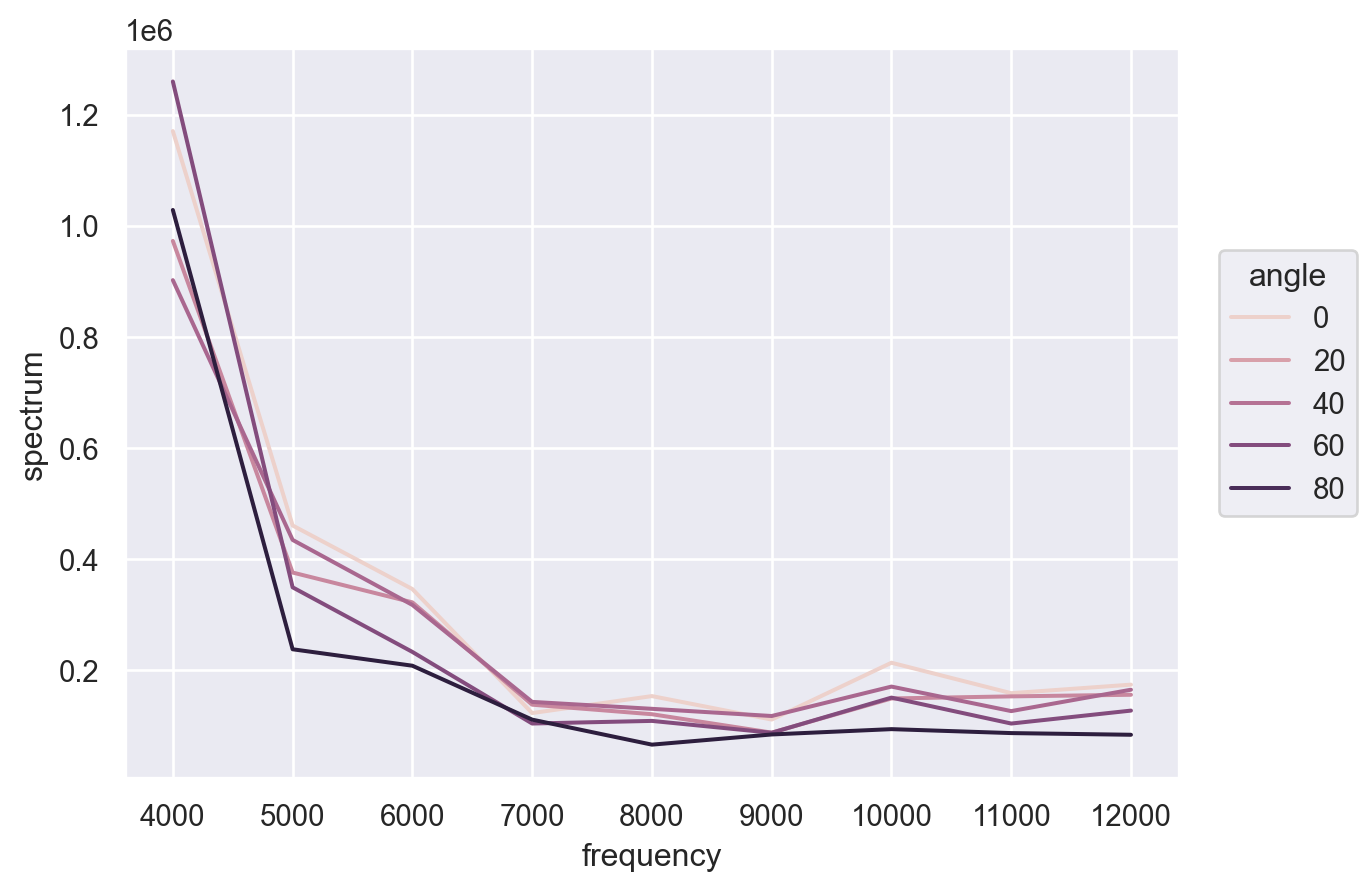

In [30]:
so.Plot(df_mic_avg_eachband, x="frequency", y="spectrum", color="angle").add(so.Line())

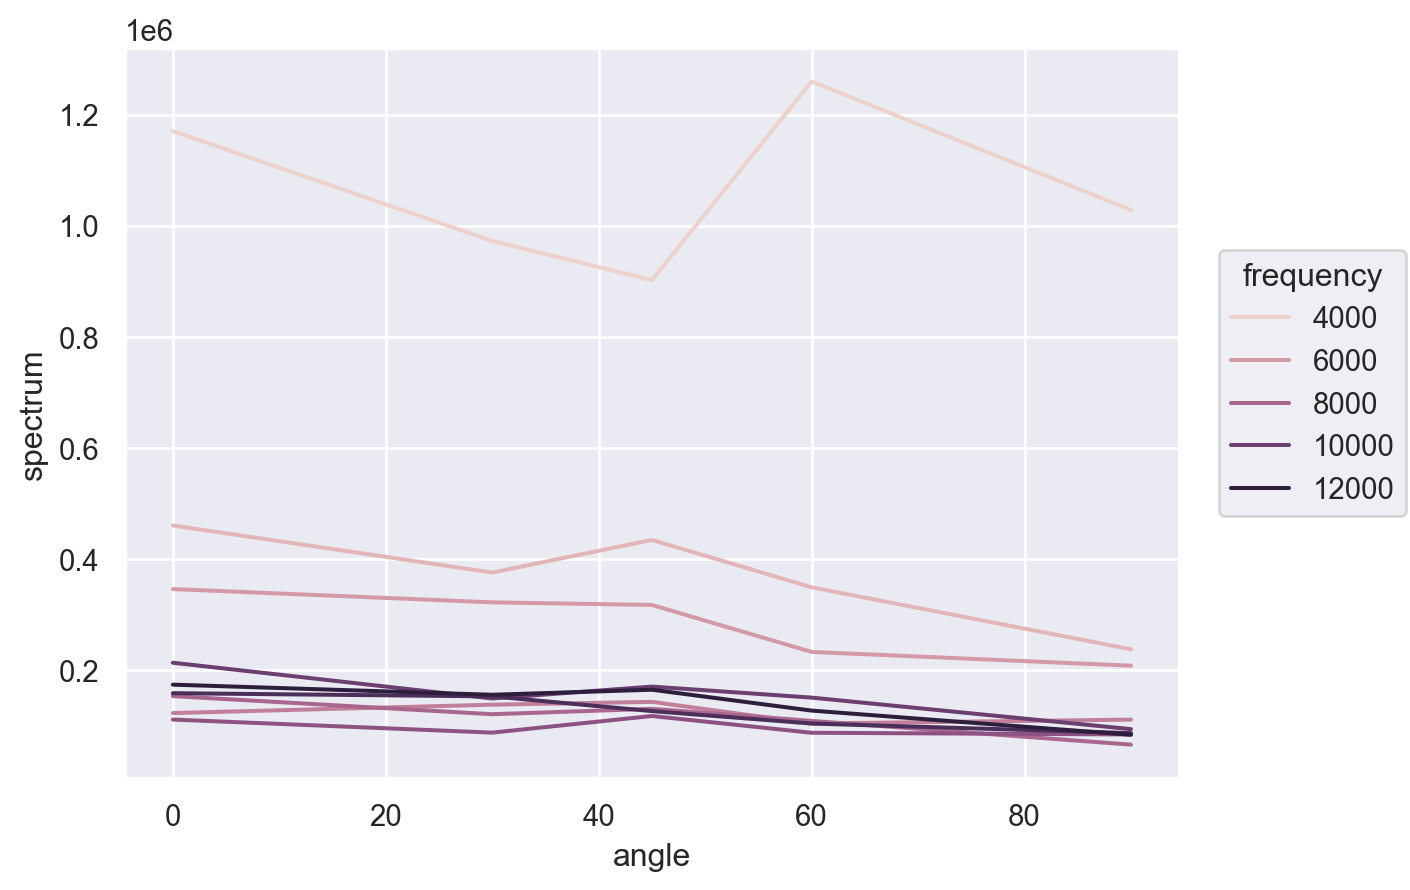

In [31]:
so.Plot(df_mic_avg_eachband, x="angle", y="spectrum", color="frequency").add(so.Line())